In [1]:
import pandas as pd
import hdbscan
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

/Users/kaushikdayalan/projects/storymachine_projects/porsche_topic_analysis/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-20 12:47:18.028866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("./data/bmw_instagram.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [40]:
representation_model = KeyBERTInspired()
model = BERTopic(representation_model=representation_model)
topics, probs = model.fit_transform(df.postContent.values)

In [41]:
model.get_topic_info().Name.values

array(['-1_smiles_smile_m5_promo',
       '0_oktoberfest_bmw_bmwperformancedrivingschools_m340i',
       '1_indy_tickets_seats_seat',
       '2_promo_fathers_promotions_promotion'], dtype=object)

In [42]:
model.get_topic_freq()

,Topic,Count
2,0,62
0,1,32
1,-1,26
3,2,18


In [43]:
x = model.get_document_info(df.postContent.values)
x

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Good morning! Time for school.,1,1_indy_tickets_seats_seat,"[indy, tickets, seats, seat, prix, sale, going...","[It’s the last lap of our INDY sale, where you...",indy - tickets - seats - seat - prix - sale - ...,0.902654,False
1,Visit beautiful Palm Springs when you take a c...,-1,-1_smiles_smile_m5_promo,"[smiles, smile, m5, promo, car, codes, helmet,...","[That blue, right? Marina Bay – it’s a Metalli...",smiles - smile - m5 - promo - car - codes - he...,0.000000,False
2,Tried an M5 with M xDrive? What are you waitin...,0,0_oktoberfest_bmw_bmwperformancedrivingschools...,"[oktoberfest, bmw, bmwperformancedrivingschool...",[Last call! Our Oktoberfest West is happening ...,oktoberfest - bmw - bmwperformancedrivingschoo...,0.948149,False
3,That “I just had a blast” feeling from driving...,0,0_oktoberfest_bmw_bmwperformancedrivingschools...,"[oktoberfest, bmw, bmwperformancedrivingschool...",[Last call! Our Oktoberfest West is happening ...,oktoberfest - bmw - bmwperformancedrivingschoo...,0.676194,False
4,"Ready, set, go! Bring a friend and line ‘em up...",1,1_indy_tickets_seats_seat,"[indy, tickets, seats, seat, prix, sale, going...","[It’s the last lap of our INDY sale, where you...",indy - tickets - seats - seat - prix - sale - ...,1.000000,False
...,...,...,...,...,...,...,...,...
133,It’s time to celebrate at Thermal! We’re hosti...,0,0_oktoberfest_bmw_bmwperformancedrivingschools...,"[oktoberfest, bmw, bmwperformancedrivingschool...",[Last call! Our Oktoberfest West is happening ...,oktoberfest - bmw - bmwperformancedrivingschoo...,1.000000,False
134,BMW + the ExtremeContact Sport 02 = Extreme Pe...,0,0_oktoberfest_bmw_bmwperformancedrivingschools...,"[oktoberfest, bmw, bmwperformancedrivingschool...",[Last call! Our Oktoberfest West is happening ...,oktoberfest - bmw - bmwperformancedrivingschoo...,0.915266,False
135,Ride in a BMW racecar! Our M Fall Festival eve...,0,0_oktoberfest_bmw_bmwperformancedrivingschools...,"[oktoberfest, bmw, bmwperformancedrivingschool...",[Last call! Our Oktoberfest West is happening ...,oktoberfest - bmw - bmwperformancedrivingschoo...,1.000000,False
136,The #SpiritofGS was alive last weekend and we’...,0,0_oktoberfest_bmw_bmwperformancedrivingschools...,"[oktoberfest, bmw, bmwperformancedrivingschool...",[Last call! Our Oktoberfest West is happening ...,oktoberfest - bmw - bmwperformancedrivingschoo...,0.872748,False


In [ ]:
model.visualize_topics()

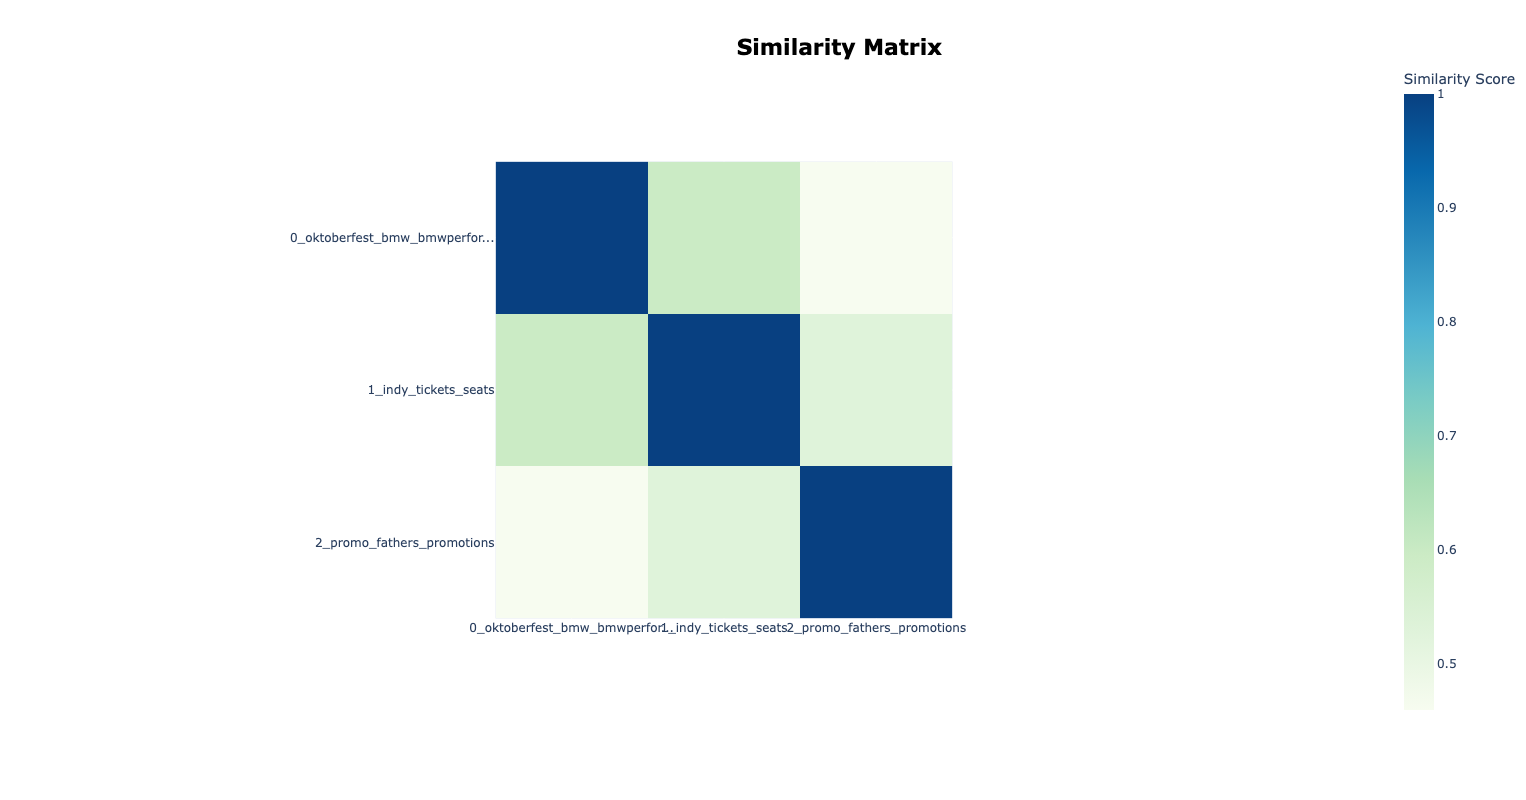

In [45]:
model.visualize_heatmap()